<h2>Predict Score Credit</h2>
Analisis terhadap dataset untuk memprediksi credit scoring pelanggan, sehingga kita dapat memastikan pelanggan yang mampu melakukan pelunasan tidak ditolak ketika melakukan pengajuan pinjaman, dan pinjaman dapat diberikan dengan principal, maturity, dan repayment calendar.

<h4>Import Library</h4>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

<h4>Data Load</h4>

In [2]:
df_train = pd.read_csv('application_train.csv')
df_test = pd.read_csv('application_test.csv')

In [3]:
df_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<h4>EDA</h4>

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


<b>Target Distribution</b>

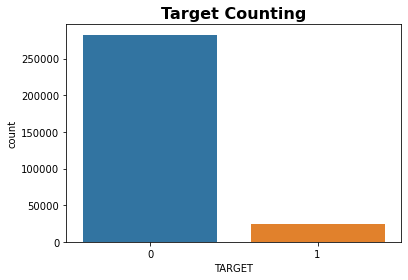

In [6]:
sns.countplot(x='TARGET', data=df_train)
plt.title('Target Counting', fontsize=16, fontweight='bold')
plt.show()

<b>Check Missing Value</b>

In [7]:
# check count missing value
df_train.isnull().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [8]:
# check unique value
df_train.nunique()

SK_ID_CURR                    307511
TARGET                             2
NAME_CONTRACT_TYPE                 2
CODE_GENDER                        3
FLAG_OWN_CAR                       2
                               ...  
AMT_REQ_CREDIT_BUREAU_DAY          9
AMT_REQ_CREDIT_BUREAU_WEEK         9
AMT_REQ_CREDIT_BUREAU_MON         24
AMT_REQ_CREDIT_BUREAU_QRT         11
AMT_REQ_CREDIT_BUREAU_YEAR        25
Length: 122, dtype: int64

In [9]:
#check duplicate data
df_train.duplicated().sum()

0

<b>Data Preprocesing</b>

In [10]:
#copy original data
data_train= df_train.copy()

In [11]:
# Drop the null columns where all values are null
data_train = data_train.dropna(axis='columns', how='all')

In [12]:
# Drop column unique
data_train.drop('SK_ID_CURR', axis=1, inplace=True)

Jika ada pasangan fitur-fitur yang memiliki korelasi tinggi maka akan diambil salah satu saja. Nilai korelasi yang dijadikan patokan sebagai korelasi tinggi tidak pasti, umumnya digunakan angka 0.7.

In [13]:
corr_matrix = data_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
to_drop_hicorr = [column for column in upper.columns if any(upper[column] > 0.7)]

In [14]:
to_drop_hicorr

['AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'FLAG_EMP_PHONE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'LIVE_REGION_NOT_WORK_REGION',
 'LIVE_CITY_NOT_WORK_CITY',
 'ELEVATORS_AVG',
 'FLOORSMIN_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'TOTALAREA_MODE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [15]:
data_train.drop(to_drop_hicorr, axis=1, inplace=True)

In [16]:
# Dropping values without any target variable information
data_train = data_train.dropna(subset=['TARGET'])
x = data_train.isnull().sum()[data_train.isnull().sum()>0]
x

NAME_TYPE_SUITE                  1292
OWN_CAR_AGE                    202929
OCCUPATION_TYPE                 96391
EXT_SOURCE_1                   173378
EXT_SOURCE_2                      660
EXT_SOURCE_3                    60965
APARTMENTS_AVG                 156061
BASEMENTAREA_AVG               179943
YEARS_BEGINEXPLUATATION_AVG    150007
YEARS_BUILD_AVG                204488
COMMONAREA_AVG                 214865
ENTRANCES_AVG                  154828
FLOORSMAX_AVG                  153020
LANDAREA_AVG                   182590
NONLIVINGAPARTMENTS_AVG        213514
NONLIVINGAREA_AVG              169682
FONDKAPREMONT_MODE             210295
HOUSETYPE_MODE                 154297
WALLSMATERIAL_MODE             156341
EMERGENCYSTATE_MODE            145755
OBS_30_CNT_SOCIAL_CIRCLE         1021
DEF_30_CNT_SOCIAL_CIRCLE         1021
DAYS_LAST_PHONE_CHANGE              1
AMT_REQ_CREDIT_BUREAU_HOUR      41519
AMT_REQ_CREDIT_BUREAU_DAY       41519
AMT_REQ_CREDIT_BUREAU_WEEK      41519
AMT_REQ_CRED

In [17]:
data_train.drop(x.index, axis=1, inplace=True)

<b>Check Categorical Features</b>

In [18]:
data_train.select_dtypes(include='object').nunique()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [19]:
data_train.select_dtypes(exclude='object').nunique()

TARGET                            2
CNT_CHILDREN                     15
AMT_INCOME_TOTAL               2548
AMT_CREDIT                     5603
REGION_POPULATION_RELATIVE       81
DAYS_BIRTH                    17460
DAYS_EMPLOYED                 12574
DAYS_REGISTRATION             15688
DAYS_ID_PUBLISH                6168
FLAG_MOBIL                        2
FLAG_WORK_PHONE                   2
FLAG_CONT_MOBILE                  2
FLAG_PHONE                        2
FLAG_EMAIL                        2
REGION_RATING_CLIENT              3
HOUR_APPR_PROCESS_START          24
REG_REGION_NOT_LIVE_REGION        2
REG_REGION_NOT_WORK_REGION        2
REG_CITY_NOT_LIVE_CITY            2
REG_CITY_NOT_WORK_CITY            2
FLAG_DOCUMENT_2                   2
FLAG_DOCUMENT_3                   2
FLAG_DOCUMENT_4                   2
FLAG_DOCUMENT_5                   2
FLAG_DOCUMENT_6                   2
FLAG_DOCUMENT_7                   2
FLAG_DOCUMENT_8                   2
FLAG_DOCUMENT_9             

In [20]:
for col in data_train.select_dtypes(include='object').columns.tolist():
    print(data_train[col].value_counts(normalize=True)*100)
    print('\n')

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64


F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64


N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64


Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64


Working                 51.631974
Commercial associate    23.289248
Pensioner               18.003258
State servant            7.057634
Unemployed               0.007154
Student                  0.005853
Businessman              0.003252
Maternity leave          0.001626
Name: NAME_INCOME_TYPE, dtype: float64


Secondary / secondary special    71.018923
Higher education                 24.344820
Incomplete higher                 3.341994
Lower secondary                   1.240931
Academic degree                   0.053331
Name: NAME_EDUCATION_TYPE, dtype: float64


Married                 63.878040
Single / not married    14.778008
Civil marriage           9.682580
S

<b>One Hot Encoding</b><br>
Semua kolom kategorikal dilakukan One Hot Encoding.

In [21]:
categorical_cols = [col for col in data_train.select_dtypes(include='object').columns.tolist()]
onehot = pd.get_dummies(data_train[categorical_cols], drop_first=True)
onehot.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_INCOME_TYPE_Commercial associate,NAME_INCOME_TYPE_Maternity leave,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<b>Standardization</b><br>
Semua kolom numerikal dilakukan proses standarisasi dengan StandardScaler.

In [22]:
numerical_cols = [col for col in data_train.columns.tolist() if col not in categorical_cols + ['TARGET']]

In [23]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
std = pd.DataFrame(ss.fit_transform(data_train[numerical_cols]), columns=numerical_cols)

In [24]:
std.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,-0.577538,0.142129,-0.478095,-0.149452,1.506880,-0.456215,0.379837,0.579154,0.001803,-0.499013,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
1,-0.577538,0.426792,1.725450,-1.252750,-0.166821,-0.460115,1.078697,1.790855,0.001803,-0.499013,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
2,-0.577538,-0.427196,-1.152888,-0.783451,-0.689509,-0.453299,0.206116,0.306869,0.001803,2.003956,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
3,-0.577538,-0.142533,-0.711430,-0.928991,-0.680114,-0.473217,-1.375829,0.369143,0.001803,-0.499013,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305
4,-0.577538,-0.199466,-0.213734,0.563570,-0.892535,-0.473210,0.191639,-0.307263,0.001803,-0.499013,...,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305


<b>Transformed Dataframe</b><br>
Menggabungkan kembali kolom-kolom hasil transformasi

In [25]:
data_model = pd.concat([onehot, std, data_train[['TARGET']]], axis=1)

<h3>Modeling</h3>

<b>Train-Test Split<b>

In [26]:
from sklearn.model_selection import train_test_split

x = data_model.drop('TARGET', axis=1)
y = data_model['TARGET']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

x_train.shape, x_test.shape

((246008, 128), (61503, 128))

<b>Training</b>

<b>Logistic Regression</b>

In [27]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [28]:
logreg_score = logreg.score(x_test, y_test)
print('Model Accuracy:', logreg_score)

Model Accuracy: 0.9194998617953596


In [29]:
y_pred_logreg = logreg.predict(x_test)
y_pred_logreg

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [30]:
y_train_pred_logreg = logreg.predict(x_train)
y_test_pred_logreg= logreg.predict(x_test)

In [31]:
from sklearn.metrics import classification_report, confusion_matrix

print('Logistic Regression Training Result:')
print('======================================================')
print('Accuracy:', logreg.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_logreg))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_logreg))

Logistic Regression Training Result:
Accuracy: 0.9191936847582193
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    226132
           1       0.20      0.00      0.00     19876

    accuracy                           0.92    246008
   macro avg       0.56      0.50      0.48    246008
weighted avg       0.86      0.92      0.88    246008

Confussion Matrix ------------------------------------
[[226128      4]
 [ 19875      1]]


In [32]:
print('Logistic Regression Testing Result:')
print('======================================================')
print('Accuracy:', logreg.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_logreg))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_logreg))

Logistic Regression Testing Result:
Accuracy: 0.9194998617953596
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       0.33      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.63      0.50      0.48     61503
weighted avg       0.87      0.92      0.88     61503

Confussion Matrix ------------------------------------
[[56550     4]
 [ 4947     2]]


<b>Random Forest</b>

In [33]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train, y_train)

RandomForestClassifier()

In [34]:
rf_score = rf_clf.score(x_test, y_test)
print('Model Accuracy:', rf_score)

Model Accuracy: 0.9195648992732062


In [35]:
y_train_pred_rf = rf_clf.predict(x_train)
y_test_pred_rf = rf_clf.predict(x_test)

In [36]:
print('Random Forest Training Result:')
print('======================================================')
print('Accuracy:', rf_clf.score(x_train, y_train))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_train, y_train_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_train, y_train_pred_rf))

Random Forest Training Result:
Accuracy: 0.9999674807323339
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    226132
           1       1.00      1.00      1.00     19876

    accuracy                           1.00    246008
   macro avg       1.00      1.00      1.00    246008
weighted avg       1.00      1.00      1.00    246008

Confussion Matrix ------------------------------------
[[226132      0]
 [     8  19868]]


In [37]:
print('Random Forest Testing Result:')
print('======================================================')
print('Accuracy:', rf_clf.score(x_test, y_test))
print('======================================================')
print('Classification Report --------------------------------')
print(classification_report(y_test, y_test_pred_rf))
print('======================================================')
print('Confussion Matrix ------------------------------------')
print(confusion_matrix(y_test, y_test_pred_rf))

Random Forest Testing Result:
Accuracy: 0.9195648992732062
Classification Report --------------------------------
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     56554
           1       1.00      0.00      0.00      4949

    accuracy                           0.92     61503
   macro avg       0.96      0.50      0.48     61503
weighted avg       0.93      0.92      0.88     61503

Confussion Matrix ------------------------------------
[[56554     0]
 [ 4947     2]]


<b>Check confusion matrix</b>

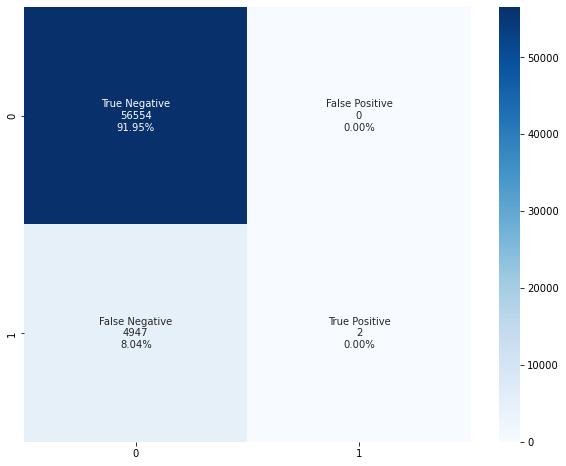

In [38]:
#y_pred_rf = rf_clf.predict(x_test)
cf_matrix = confusion_matrix(y_test, y_test_pred_rf)

group_names = ["True Negative", "False Positive", "False Negative", "True Positive"]
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)

plt.figure(figsize=(10, 8))
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')
plt.show()